In [1]:
# Sources:
#  Learning SimpleITK: https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks/tree/master/Python


# List files (training {normal,peumonia}, testing)

In [2]:
import os
from glob import glob

CUR_DIR = os.getcwd()

PIC_DIR = f'{CUR_DIR}/chest-xray-pneumonia/chest_xray/chest_xray/'
assert os.path.exists(PIC_DIR), f'missing folder {PIC_DIR}'

get_jpeg = lambda path: glob(f'{path}/*.jpeg')

train_normal_files = get_jpeg(f'{PIC_DIR}/train/NORMAL/')
train_pneumo_files =  get_jpeg(f'{PIC_DIR}/train/PNEUMONIA/')

test_normal_files = get_jpeg(f'{PIC_DIR}/test/NORMAL/')
test_pneumo_files =  get_jpeg(f'{PIC_DIR}/test/PNEUMONIA/')

names = ('train_normal_files', 'train_pneumo_files', 'test_normal_files', 'test_pneumo_files')
sets = (train_normal_files, train_pneumo_files, test_normal_files, test_pneumo_files)

for name, files in zip(names, sets):
    print(name, len(files))

train_normal_files 1341
train_pneumo_files 3875
test_normal_files 234
test_pneumo_files 390


# Checking Width/Height/Dim of each image

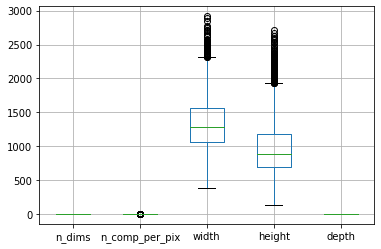

       n_dims  n_comp_per_pix        width       height   depth
count  5840.0     5840.000000  5840.000000  5840.000000  5840.0
mean      2.0        1.096918  1327.825000   970.600685     0.0
std       0.0        0.429505   363.764314   383.681911     0.0
min       2.0        1.000000   384.000000   127.000000     0.0
25%       2.0        1.000000  1056.000000   688.000000     0.0
50%       2.0        1.000000  1281.000000   886.000000     0.0
75%       2.0        1.000000  1560.000000  1187.000000     0.0
max       2.0        3.000000  2916.000000  2713.000000     0.0


In [31]:
import SimpleITK as sitk
from pandas import DataFrame
import matplotlib.pyplot as plt

# Checking dimensions of images
records = []
for name, pics in zip(names, sets):
    tp = {'name': name}
    for pic in pics:
        img = sitk.ReadImage(pic)
        tp['fname'] = pic
        tp['n_dims'] = img.GetDimension()
        tp['n_comp_per_pix'] = img.GetNumberOfComponentsPerPixel()
        tp['width'] = img.GetWidth()
        tp['height'] = img.GetHeight()
        tp['depth'] = img.GetDepth()
        tp['spacing'] = img.GetSpacing()
        records.append(tp.copy())

df = DataFrame.from_records(records)
df.boxplot()
plt.show()
print(df.describe())

In [32]:
# Resize is needed
# sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.png'))